In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('police.csv')

In [4]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [7]:
df.shape

(91741, 15)

In [8]:
df.drop('county_name', axis='columns', inplace=True)
df.shape

(91741, 14)

In [9]:
df.describe()

,driver_age_raw,driver_age
count,86414.000000,86120.000000
mean,1970.491228,34.011333
std,110.914909,12.738564
min,0.000000,15.000000
25%,1967.000000,23.000000
50%,1980.000000,31.000000
75%,1987.000000,43.000000
max,8801.000000,99.000000


In [10]:
df.dropna(subset=['search_type'], inplace=True)

In [11]:
df.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            3
driver_race           0
violation_raw         0
violation             0
search_conducted      0
search_type           0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [12]:
df.dropna(subset=['driver_age'], inplace=True)

df.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
search_type           0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [13]:
df.shape

(3193, 14)

In [14]:
df.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [15]:
df.driver_gender.value_counts()

M    2722
F     471
Name: driver_gender, dtype: int64

In [16]:
df.driver_gender.value_counts(normalize=True)

M    0.85249
F    0.14751
Name: driver_gender, dtype: float64

In [17]:
df.is_arrested.value_counts()

False    2100
True     1093
Name: is_arrested, dtype: int64

In [18]:
df.driver_gender.head()

24     M
40     M
41     M
80     M
106    M
Name: driver_gender, dtype: object

In [19]:
df.is_arrested.head()

24      True
40      True
41     False
80      True
106    False
Name: is_arrested, dtype: object

In [20]:
df.driver_gender.astype(bool)
df.driver_gender.head()

24     M
40     M
41     M
80     M
106    M
Name: driver_gender, dtype: object

In [21]:
df.is_arrested.astype(bool)
df.is_arrested.head()

24      True
40      True
41     False
80      True
106    False
Name: is_arrested, dtype: object

In [22]:
combined_date_time = df.stop_date.str.cat(df.stop_time, sep=' ')
df['stop_datetime'] = pd.to_datetime(combined_date_time)

In [23]:
df.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object

In [24]:
df.set_index('stop_datetime', inplace=True)

In [25]:
df.index

DatetimeIndex(['2005-08-28 01:00:00', '2005-10-01 00:00:00',
               '2005-10-01 00:00:00', '2005-10-02 09:30:00',
               '2005-10-03 14:00:00', '2005-10-04 01:20:00',
               '2005-10-05 00:20:00', '2005-10-05 22:50:00',
               '2005-10-07 12:00:00', '2005-10-07 12:45:00',
               ...
               '2015-12-06 10:33:00', '2015-12-07 14:10:00',
               '2015-12-12 16:46:00', '2015-12-12 20:00:00',
               '2015-12-16 14:52:00', '2015-12-18 09:30:00',
               '2015-12-21 01:39:00', '2015-12-28 11:05:00',
               '2015-12-30 08:51:00', '2015-12-30 13:15:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=3193, freq=None)

In [26]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [27]:
df.violation.value_counts()

Speeding               956
Moving violation       895
Equipment              704
Registration/plates    333
Other                  209
Seat belt               96
Name: violation, dtype: int64

In [28]:
df.violation.value_counts(normalize=True)

Speeding               0.299405
Moving violation       0.280301
Equipment              0.220482
Registration/plates    0.104291
Other                  0.065456
Seat belt              0.030066
Name: violation, dtype: float64

In [29]:
female = df[df.driver_gender == 'F']
male = df[df.driver_gender == 'M']

In [30]:
female.violation.value_counts(normalize=True)

Speeding               0.286624
Moving violation       0.246285
Equipment              0.225053
Registration/plates    0.142251
Other                  0.082803
Seat belt              0.016985
Name: violation, dtype: float64

In [31]:
male.violation.value_counts(normalize=True)

Speeding               0.301616
Moving violation       0.286187
Equipment              0.219691
Registration/plates    0.097722
Other                  0.062454
Seat belt              0.032329
Name: violation, dtype: float64

In [32]:
print('Female shape: ', female.shape)
print(' ')
print('Male shape: ', male.shape)

Female shape:  (471, 14)
 
Male shape:  (2722, 14)


## Does gender affect who gets a ticket for speeding?

#### Comparing speeding outcomes by gender

In [33]:
female_and_speeding = df[(df.driver_gender == 'F') & (df.violation == 'Speeding')]

male_and_speeding = df[(df.driver_gender == 'M') & (df.violation == 'Speeding')]

In [34]:
female_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.711111
Arrest Driver       0.222222
Warning             0.037037
Arrest Passenger    0.029630
Name: stop_outcome, dtype: float64

In [35]:
male_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.669915
Arrest Driver       0.289890
Arrest Passenger    0.018270
Warning             0.013398
No Action           0.007308
N/D                 0.001218
Name: stop_outcome, dtype: float64

## Does gender affect whose vehicle is searched?

In [36]:
df.search_conducted.dtypes

dtype('bool')

In [37]:
df.search_conducted.value_counts(normalize=True)

True    1.0
Name: search_conducted, dtype: float64

In [38]:
df.search_conducted.mean()

1.0

In [39]:
#Search rate for female drivers
df[df.driver_gender == 'F'].search_conducted.mean()

1.0

In [40]:
#Search rate for male drivers
df[df.driver_gender == 'M'].search_conducted.mean()

1.0

In [41]:
#Search rate for both drivers
df.groupby('driver_gender').search_conducted.mean()

driver_gender
F    1.0
M    1.0
Name: search_conducted, dtype: float64

In [42]:
df.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                1.0
                     M                1.0
Moving violation     F                1.0
                     M                1.0
Other                F                1.0
                     M                1.0
Registration/plates  F                1.0
                     M                1.0
Seat belt            F                1.0
                     M                1.0
Speeding             F                1.0
                     M                1.0
Name: search_conducted, dtype: float64

In [43]:
df.groupby(['driver_gender','violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              1.0
               Moving violation       1.0
               Other                  1.0
               Registration/plates    1.0
               Seat belt              1.0
               Speeding               1.0
M              Equipment              1.0
               Moving violation       1.0
               Other                  1.0
               Registration/plates    1.0
               Seat belt              1.0
               Speeding               1.0
Name: search_conducted, dtype: float64

Counting Protective Frisk

In [44]:
df.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               890
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             160
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Incident to Arrest,Probab

In [45]:
df['frisk'] = df.search_type.str.contains('Protective Frisk', na=False)

In [46]:
df.frisk.dtypes

dtype('bool')

In [47]:
df.frisk.sum()

272

Comparing frisk rates by gender

In [48]:
searched = df[df.search_conducted == True]

In [49]:
searched.frisk.mean()

0.08518634512997181

In [50]:
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.061571
M    0.089273
Name: frisk, dtype: float64

Calculating the hourly arrest rate

In [51]:
df.is_arrested.mean()

0.3423113059818353

In [52]:
df.groupby(df.index.hour).is_arrested.mean()

stop_datetime
0     0.326923
1     0.358696
2     0.444444
3     0.391304
4     0.666667
5     0.750000
6     0.314286
7     0.295082
8     0.369565
9     0.320000
10    0.283019
11    0.325153
12    0.494118
13    0.277778
14    0.327684
15    0.283784
16    0.313043
17    0.280488
18    0.404762
19    0.312500
20    0.416667
21    0.395062
22    0.327160
23    0.334532
Name: is_arrested, dtype: float64

In [53]:
hourly_arrest_rate = df.groupby(df.index.hour).is_arrested.mean()

Plotting the hourly arrest rate

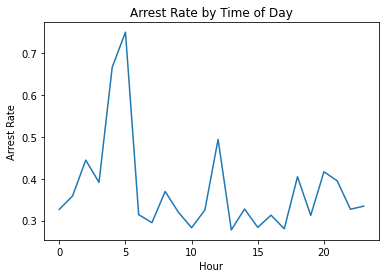

In [54]:
plt.plot(hourly_arrest_rate)
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

plt.show()

Plotting drug-related stops

In [56]:
df.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.140625
2006-12-31    0.145320
2007-12-31    0.184573
2008-12-31    0.193878
2009-12-31    0.220472
2010-12-31    0.210345
2011-12-31    0.231884
2012-12-31    0.319209
2013-12-31    0.426471
2014-12-31    0.446970
2015-12-31    0.369099
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

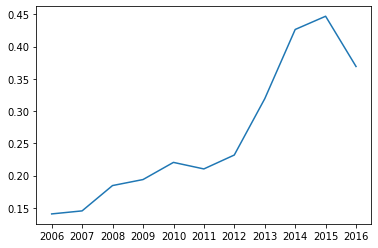

In [57]:
annual_drug_rate = df.drugs_related_stop.resample('A').mean()

plt.plot(annual_drug_rate)
plt.show()

Comparing drug and search rates

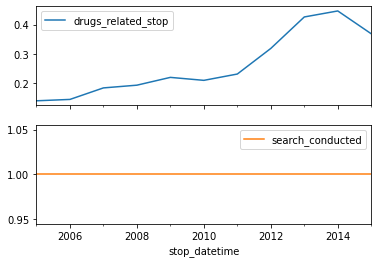

In [59]:
annual_search_rate = df.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

annual.plot(subplots = True)
plt.show()

Converting stop durations to numbers

In [63]:
df.stop_duration.unique()

array(['16-30 Min', '30+ Min', '0-15 Min'], dtype=object)

In [64]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
df['stop_minutes'] = df.stop_duration.map(mapping)
df.stop_minutes.unique()

array([23, 45,  8], dtype=int64)

Plotting stop length

In [65]:
df.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 32.150000
Call for Service                    32.440367
Equipment/Inspection Violation      21.964489
Motorist Assist/Courtesy            30.785714
Other Traffic Violation             24.692737
Registration Violation              27.234234
Seatbelt Violation                  19.260417
Special Detail/Directed Patrol      27.423077
Speeding                            24.756276
Suspicious Person                   29.150000
Violation of City/Town Ordinance    21.866667
Warrant                             24.400000
Name: stop_minutes, dtype: float64

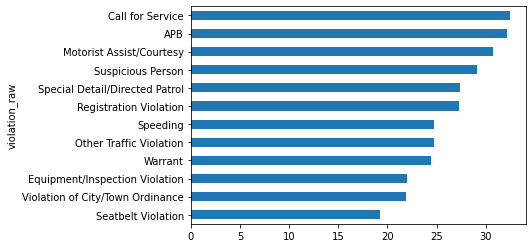

In [66]:
stop_length = df.groupby('violation_raw').stop_minutes.mean()
stop_length.sort_values().plot(kind='barh')
plt.show()